# Unsupervised machine learning

## Clustering

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

### K-means clustering

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

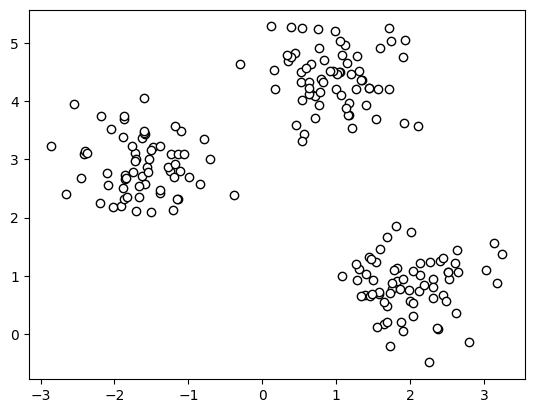

In [2]:
# create dataset
X, y = make_blobs(
    n_samples=200, 
    n_features=2,       
    centers=3, 
    cluster_std=0.5,
    random_state=0
)
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

In [3]:
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)
y_km = kmeans.fit_predict(X)
y_km

array([0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 2], dtype=int32)

In [4]:
kmeans.labels_

array([0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 2], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[-1.62597658,  2.89784482],
       [ 0.96573445,  4.39663084],
       [ 2.00955762,  0.8313862 ]])

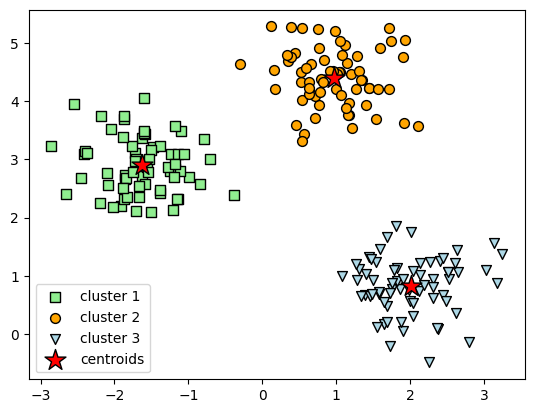

In [6]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

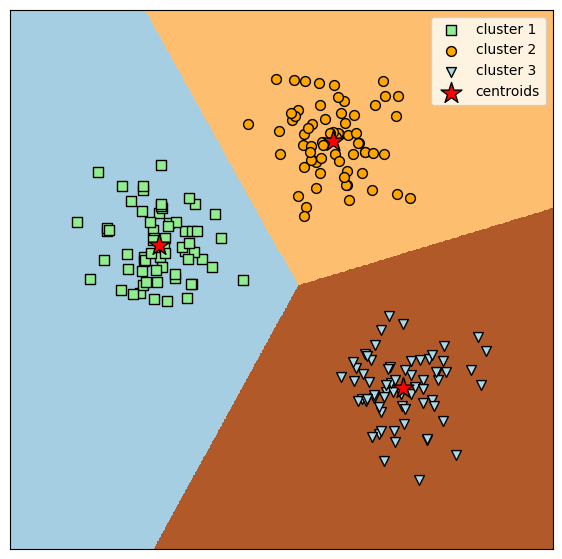

In [7]:
import numpy as np

np.random.seed(42)

kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=8, 
    tol=1e-04, random_state=2
)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
y_km = kmeans.fit_predict(X)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

In [8]:
# distortion measure
kmeans.inertia_

93.99874702328015

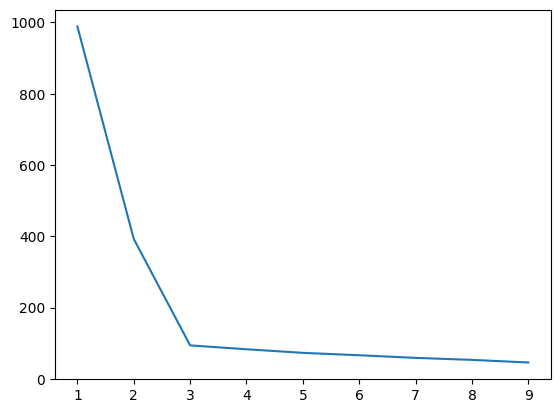

In [9]:
# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

### DBSCAN

Overview over different clustering methods: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

Базується на густині даних в певному регіоні простору.

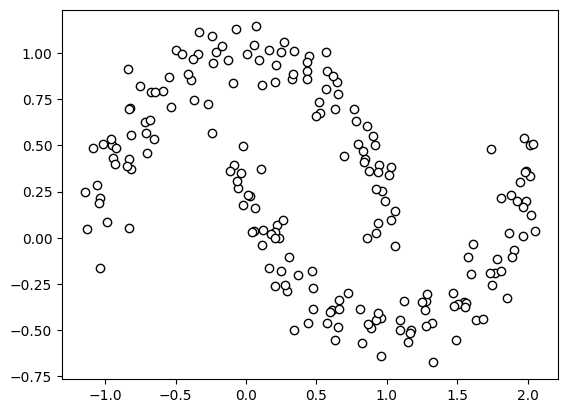

In [10]:
# create dataset
X, y = make_moons(
    n_samples=200,
    noise=0.09,
    random_state=0
)
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white',
   edgecolor='black'
)

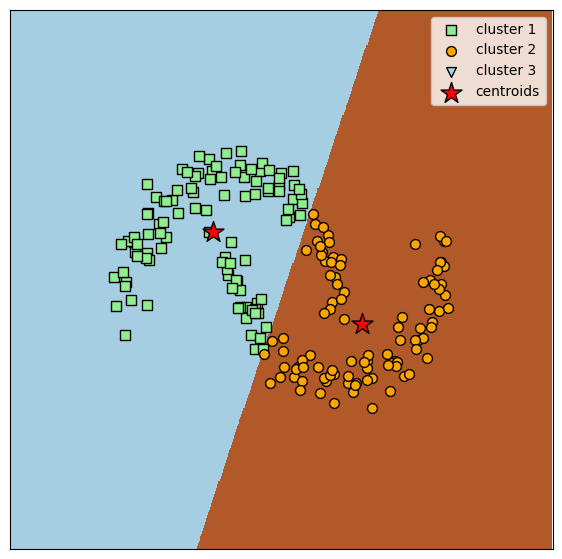

In [11]:
np.random.seed(42)

kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=1, max_iter=8, 
    tol=1e-04, random_state=2
)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
y_km = kmeans.fit_predict(X)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


In [13]:
labels

array([ 0,  1,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1])

Estimated number of clusters: 2
Estimated number of noise points: 4


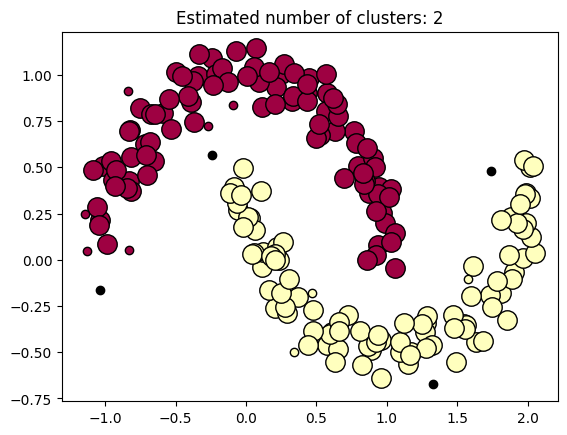

In [14]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [15]:
from sklearn import metrics
metrics.silhouette_score(X, labels)

0.24812861228218075

Estimated number of clusters: 7
Estimated number of noise points: 14


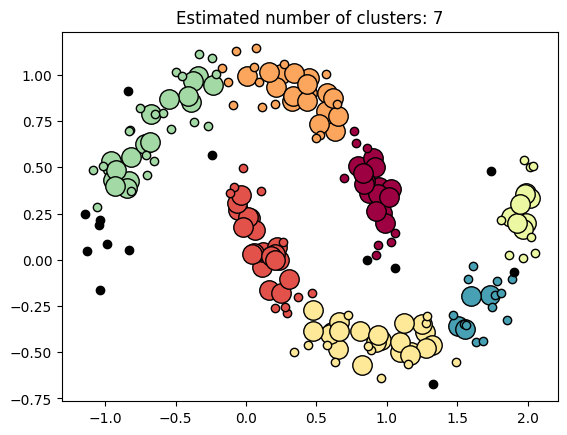

In [16]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## PCA - Principal Component Analysis

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

Головна компонента - це напрямок у просторі, де дисперсія даних максимальна. Друга головна компонента - це напрямок у просторі, де дисперсія даних максимальна, з урахуванням першої головної компоненти. Третя головна компонента - це напрямок у просторі, де дисперсія даних максимальна, з урахуванням першої та другої головних компонент.

In [17]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X) # normalizing the features
X_norm

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [21]:
np.mean(X_norm), np.std(X_norm)

(-1.4684549872375404e-15, 1.0)

In [22]:
import pandas as pd
feat_cols = ['feature'+str(i) for i in range(X_norm.shape[1])]
pd.DataFrame(X_norm, columns=feat_cols)

,feature0,feature1,feature2,feature3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [23]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=2)
principalComponents_iris = pca_iris.fit_transform(X_norm)
principalComponents_iris

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [24]:
principal_Df = pd.DataFrame(data = principalComponents_iris)#, columns = ['principal component 1', 'principal component 2'])
principal_Df

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [25]:
# пояснена дисперсія
pca_iris.explained_variance_  # of the two principal components

array([2.93808505, 0.9201649 ])

In [26]:
# Once you have the principal components, you can find the explained_variance_ratio. 
# It will provide you with the amount of information or variance each principal component holds after 
# projecting the data to a lower dimensional subspace.
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))  # of the two principal components

Explained variation per principal component: [0.72962445 0.22850762]


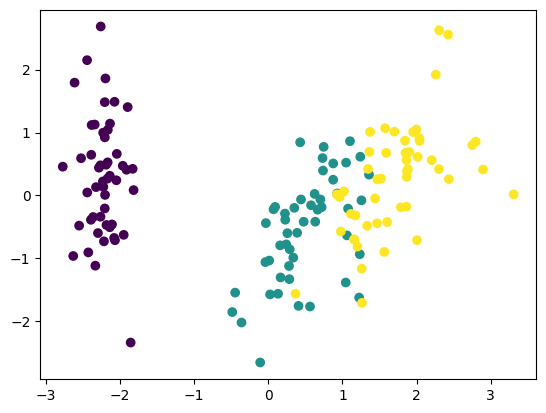

In [27]:
plt.scatter(principalComponents_iris[:, 0], principalComponents_iris[:, 1], c=y, cmap='viridis')

### PCA step by step

In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Standardize the data (centering)
# Centering the data: Subtract the mean of each feature from the corresponding values in the dataset. 
# This step ensures that the data is centered around the origin.
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)
X_centered

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [29]:
# Step 3: Compute the covariance matrix (матриця коваріації)
# Computing the covariance matrix: Calculate the covariance matrix of the centered data. 
# The covariance matrix represents the relationships between different features in the dataset.

# коваріація — це міра спільної мінливості двох випадкових змінних. 
# Якщо більші значення однієї змінної здебільшого відповідають більшим значенням іншої, й те саме виконується для менших значень, 
# тобто змінні схильні демонструвати подібну поведінку, то коваріація є додатною. 
cov_matrix = np.cov(X_centered, rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [30]:
# https://uk.wikipedia.org/wiki/Власні_вектори_та_власні_значення
# Step 4: Calculate eigenvalues and eigenvectors (власні значення і власні вектори)

# Calculating eigenvalues and eigenvectors: Find the eigenvalues and eigenvectors of the covariance matrix. 
# The eigenvectors represent the principal components, and the corresponding eigenvalues indicate the amount 
# of variance explained by each principal component.

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("eigenvectors=")
print(f"{eigenvectors}")
print(f"{eigenvalues=}")

# An eigenvector is a special kind of vector (an arrow with direction) that, when multiplied by this matrix, 
# only changes its length but not its direction. 
# It's like finding an arrow that, when you push it through the matrix, 
# comes out pointing the same way, but it might stretch or shrink.
# The stretching or shrinking factor is what we call the eigenvalue. 
# It tells us how much the eigenvector gets scaled during this process.

# Finding the eigenvectors and eigenvalues of these matrices helps us understand the most important directions (eigenvectors) 
# and how much things change along those directions (eigenvalues).

# https://towardsdatascience.com/eigenvectors-eigenvalues-how-to-explain-it-to-a-10-year-old-3150fdba6acd#

eigenvectors=
[[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]
eigenvalues=array([0.02085386, 0.14774182, 0.9201649 , 2.93808505])


In [31]:
# Step 5: Select principal components
# Selecting principal components: Sort the eigenvectors based on their corresponding eigenvalues in descending order. 
# The eigenvectors with the highest eigenvalues (most variance) are chosen as the principal components.
sorted_indices = np.argsort(eigenvalues)[::-1]
top_k_components = 2  # Choose the number of principal components
selected_indices = sorted_indices[:top_k_components]
principal_components = eigenvectors[:, selected_indices]
principal_components

array([[-0.52106591,  0.37741762],
       [ 0.26934744,  0.92329566],
       [-0.5804131 ,  0.02449161],
       [-0.56485654,  0.06694199]])

In [32]:
eigenvalues

array([0.02085386, 0.14774182, 0.9201649 , 2.93808505])

In [33]:
# Step 6: Create the transformation matrix
# Form a matrix using the selected eigenvectors as columns. This matrix serves as the transformation matrix.
transformation_matrix = principal_components

# Step 7: Apply the transformation to get the new data (скалярний продукт)
# Applying the transformation: Multiply the centered data by the transformation matrix to obtain 
# the new set of uncorrelated variables, which are the principal components.
X_pca = X_centered.dot(transformation_matrix)

# Print the results
print("Original Data Shape:", X.shape)
print("Transformed Data Shape (After PCA):", X_pca.shape)

Original Data Shape: (150, 4)
Transformed Data Shape (After PCA): (150, 2)


In [34]:
principal_components

array([[-0.52106591,  0.37741762],
       [ 0.26934744,  0.92329566],
       [-0.5804131 ,  0.02449161],
       [-0.56485654,  0.06694199]])

In [35]:
X_pca

array([[ 2.26470281,  0.4800266 ],
       [ 2.08096115, -0.67413356],
       [ 2.36422905, -0.34190802],
       [ 2.29938422, -0.59739451],
       [ 2.38984217,  0.64683538],
       [ 2.07563095,  1.48917752],
       [ 2.44402884,  0.0476442 ],
       [ 2.23284716,  0.22314807],
       [ 2.33464048, -1.11532768],
       [ 2.18432817, -0.46901356],
       [ 2.1663101 ,  1.04369065],
       [ 2.32613087,  0.13307834],
       [ 2.2184509 , -0.72867617],
       [ 2.6331007 , -0.96150673],
       [ 2.1987406 ,  1.86005711],
       [ 2.26221453,  2.68628449],
       [ 2.2075877 ,  1.48360936],
       [ 2.19034951,  0.48883832],
       [ 1.898572  ,  1.40501879],
       [ 2.34336905,  1.12784938],
       [ 1.914323  ,  0.40885571],
       [ 2.20701284,  0.92412143],
       [ 2.7743447 ,  0.45834367],
       [ 1.81866953,  0.08555853],
       [ 2.22716331,  0.13725446],
       [ 1.95184633, -0.62561859],
       [ 2.05115137,  0.24216355],
       [ 2.16857717,  0.52714953],
       [ 2.13956345,

In [36]:
principal_Df_new = pd.DataFrame(data=X_pca)
principal_Df_new.head()

,0,1
0,2.264703,0.480027
1,2.080961,-0.674134
2,2.364229,-0.341908
3,2.299384,-0.597395
4,2.389842,0.646835


In [37]:
principal_Df.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [38]:
principalComponents_iris

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

### Using principal components as features to build models

Train accuracy: 0.9133333333333333
Train accuracy: 0.9133333333333333
Train accuracy: 0.92
Train accuracy: 0.9266666666666666


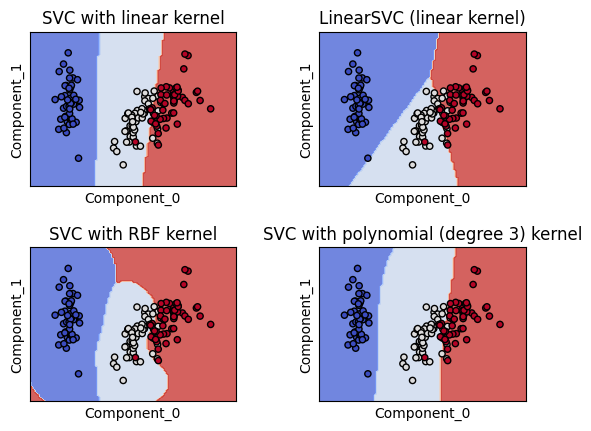

In [39]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

X = principalComponents_iris

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Component_0",
        ylabel="Component_1",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    y_train_pred = clf.predict(X)
    print("Train accuracy:", accuracy_score(y_train_pred, y))

plt.show()

In [40]:
# Compare with training on all features
X = iris.data[:, :4]
y = iris.target

C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model.fit(X, y)

y_pred = model.predict(X)
accuracy_score(y_pred, y)

0.98